---
# **LOGISITC REGRESSION**
---

Algoritmo de clasificación para variables categóricas

Es útil cuando:
* Se trata de datos binarios (Sí/No)
* Se requieren resultados probabilísticos
* Se requiere un límite de decisión lineal.
* Conocer el impacto de una característica.

**Función Sigmoid** = Función logística

Es la función que nos permite obtener la probabilidad de pertenencia de una muestra a una clase.

![](assets/log_reg1.png)


**Pasos de entrenamiento**:
1. Inicializar $\theta$ (weight)
2. Calcular $\hat{y}$ para una muestra.
3. Comparar la salida con la verdad, y guardarlo como error.
4. Calcular el error para todas las muestras.
5. Cambiar $\theta$ para reducir el error (reducir el costo).
6. Regresar al paso 2.


**¿Cómo reducir el error?**: Minimizar la función de costo. Empleando **Descenso del Gradiente** (optimizador).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
df.shape

(200, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [5]:
df["churn"] = df["churn"].astype(int)

In [11]:
X = np.asarray(df.drop(columns=["churn"]))
y = np.asarray(df["churn"])

In [14]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [15]:
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23718629,
        -0.84846321, -0.80905935, -0.97385292, -0.56616669, -0.38801572,
        -0.61983235, -0.69284848, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.07226665,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.5565779 ,
        -0.84846321, -0.80905935, -0.97385292, -0.5661

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

X_train.shape, X_test.shape

((150, 27), (50, 27))

## **Regresión Logística**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [19]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59642303, 0.40357697],
       [0.6041136 , 0.3958864 ],
       [0.57656018, 0.42343982],
       [0.637643  , 0.362357  ],
       [0.57481607, 0.42518393],
       [0.60355234, 0.39644766],
       [0.49847154, 0.50152846],
       [0.61756457, 0.38243543],
       [0.38390867, 0.61609133],
       [0.56718222, 0.43281778],
       [0.43861812, 0.56138188],
       [0.56067092, 0.43932908],
       [0.53328276, 0.46671724],
       [0.39255146, 0.60744854],
       [0.68205676, 0.31794324],
       [0.52817231, 0.47182769],
       [0.50308159, 0.49691841],
       [0.54067117, 0.45932883],
       [0.43411764, 0.56588236],
       [0.57741001, 0.42258999],
       [0.50198585, 0.49801415],
       [0.41268864, 0.58731136],
       [0.77939726, 0.22060274],
       [0.3558622 , 0.6441378 ],
       [0.43468709, 0.56531291],
       [0.73875156, 0.26124844],
       [0.40500223, 0.59499777],
       [0.42775354, 0.57224646],
       [0.53581635, 0.46418365],
       [0.80077131, 0.19922869],
       [0.

In [21]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.627906976744186

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 7  9]
 [ 7 27]]


Confusion matrix, without normalization
[[ 7  9]
 [ 7 27]]


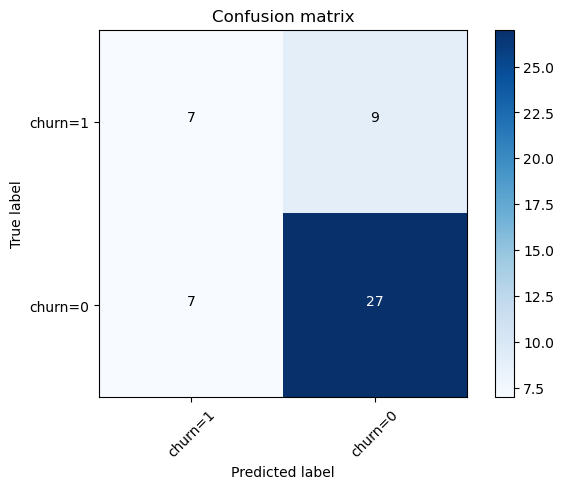

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [24]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        34
           1       0.50      0.44      0.47        16

    accuracy                           0.68        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.67      0.68      0.67        50



In [25]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.588057282660111

In [26]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.56
